**Problem Statement :**
----
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.
----
**Dataset Information :**
----
The walmart.csv contains 6435 rows and 8 columns.
----
| Feature Name  | Description                        |
|--------------|----------------------------------|
| Store        | Store number                     |
| Date         | Week of Sales                   |
| Weekly_Sales | Sales for the given store in that week |
| Holiday_Flag | If it is a holiday week          |
| Temperature  | Temperature on the day of the sale |
| Fuel_Price   | Cost of the fuel in the region   |
| CPI          | Consumer Price Index             |
| Unemployment | Unemployment Rate               |


**Import necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Import Dataset**

In [2]:
data = pd.read_csv("Walmart DataSet.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Data Cleaning

In [3]:
# # this is to display the output in proper numerical format:
# pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
if data.isnull().sum().sum()==0:
    print(f"No Null Values Found: \n{ data.isnull().sum()}")
else:
    data.dropna()
    print(f'Total Null Values dropped : {data.isnull().sum()}')

if data.duplicated().sum().sum()==0:
    print(f"No Duplicate Values Found : {data.duplicated().sum()}")
else:
    data.drop_duplicates()
    print(f'Total Duplicated Values dropped : {data.duplicated().sum()}')

No Null Values Found: 
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
No Duplicate Values Found : 0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# Step 1: Convert the 'date' column from object to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)

# Step 2: Add a new column indicating the week , month, year number
data['week'] = data['Date'].dt.isocalendar().week
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [8]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,10,3,2010
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,11,3,2010
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,12,3,2010
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,13,4,2010
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,14,4,2010


In [9]:
data.groupby('month')['Weekly_Sales'].mean()

month
1     9.238846e+05
2     1.053200e+06
3     1.013309e+06
4     1.026762e+06
5     1.031714e+06
6     1.064325e+06
7     1.031748e+06
8     1.048017e+06
9     9.893353e+05
10    9.996321e+05
11    1.147266e+06
12    1.281864e+06
Name: Weekly_Sales, dtype: float64

Outliers Check

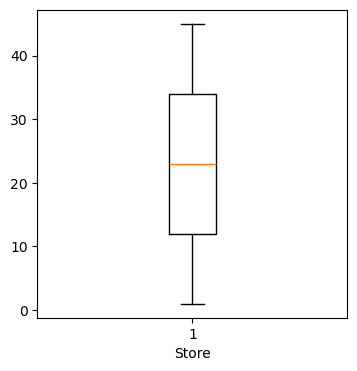

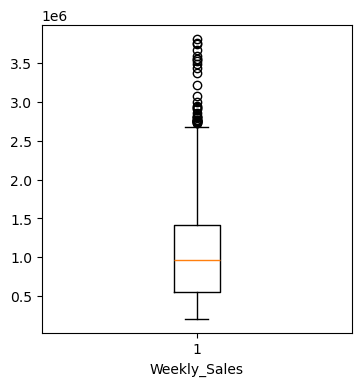

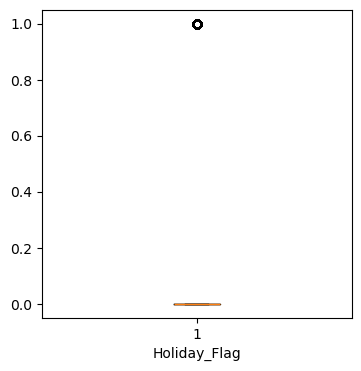

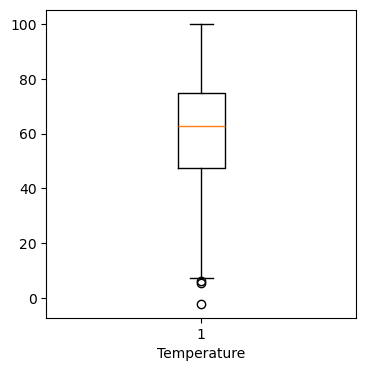

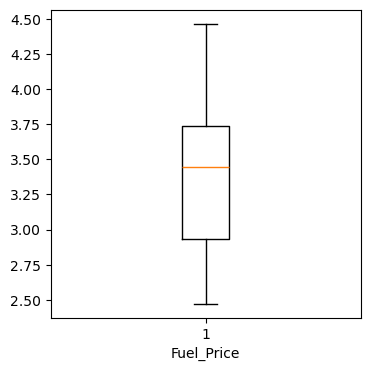

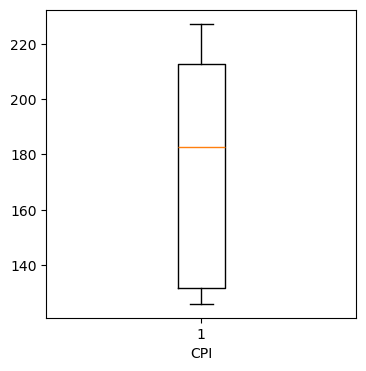

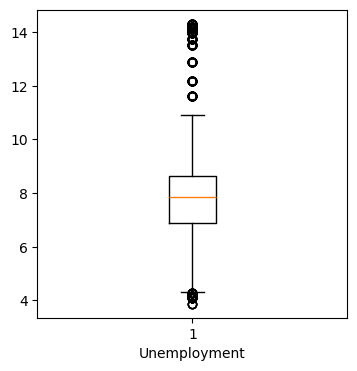

In [10]:
for i in data.columns:
    if data[i].dtypes == "float64" or data[i].dtypes == "int64":
        plt.figure(figsize=(4,4))
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.show()

In [11]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,25.818182,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.0,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,14.0,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,26.0,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,38.0,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,52.0,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,14.129201,3.238308,0.797019


--------
# Second Step

# EDA

In [12]:
data.head() # look at the data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010


### Now we are exploring the data by Indipendent variables with the target variable which is Weekly sales

## Store V/s Weekly Sales

In [13]:
data_store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
data_store_sales

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


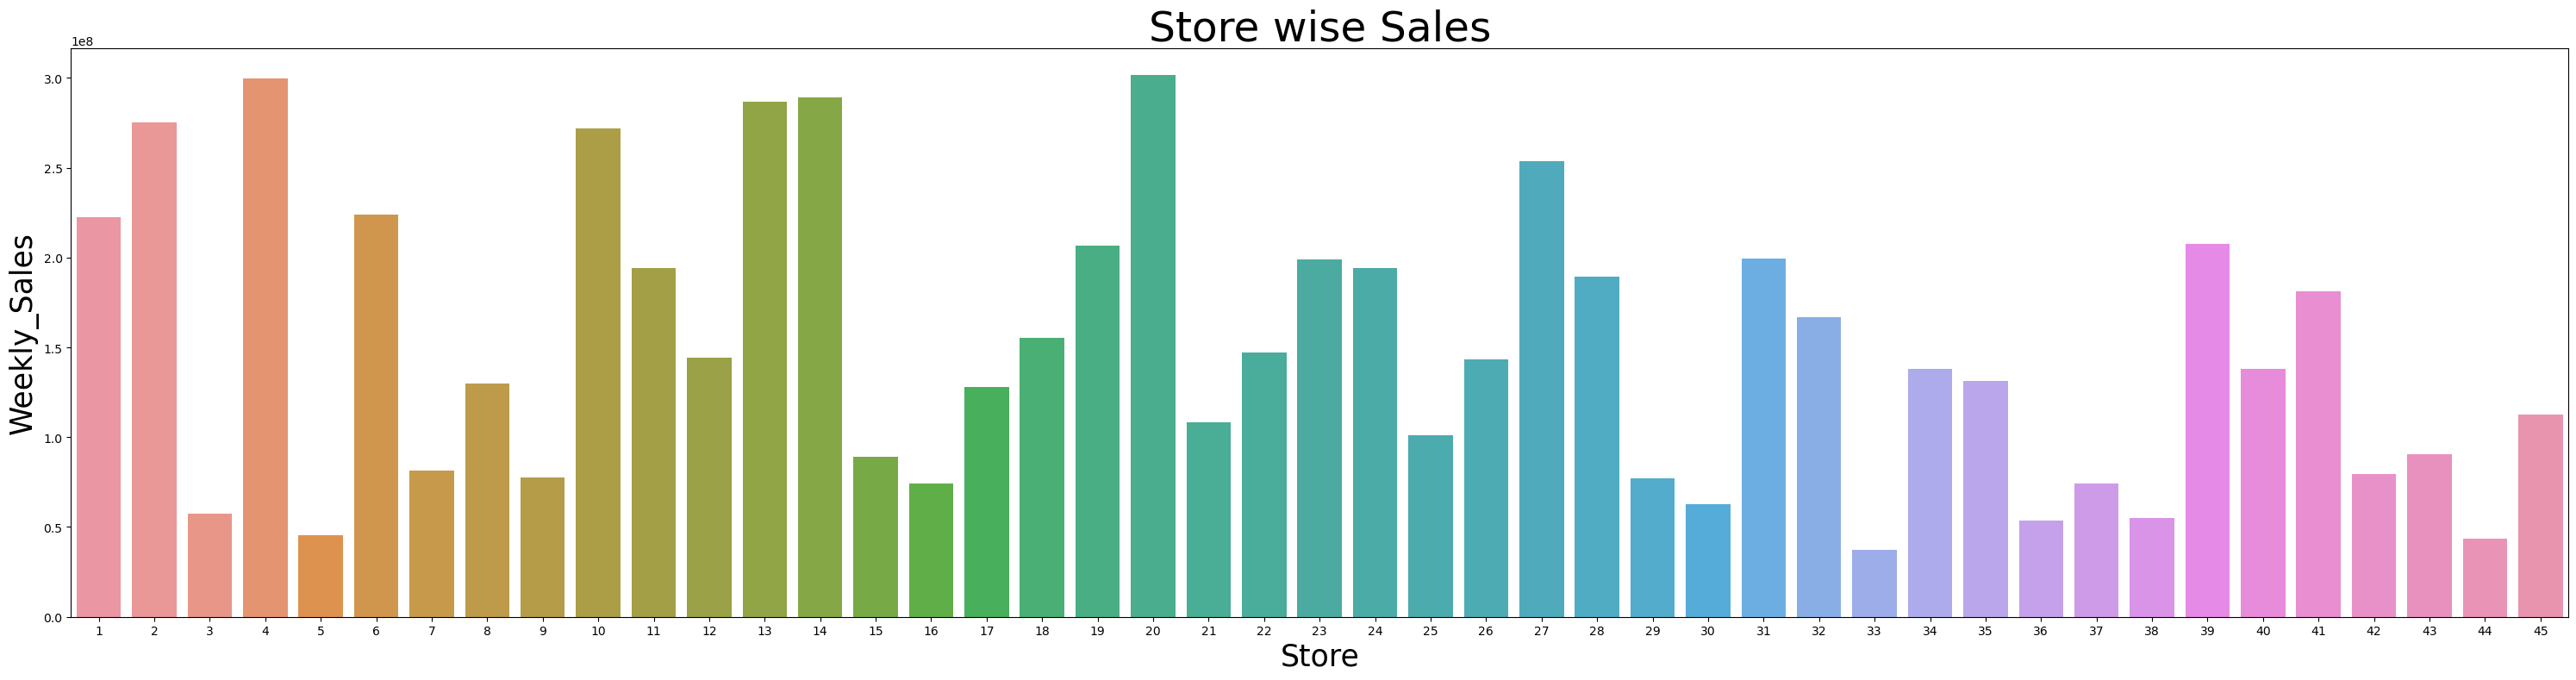

In [14]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data_store_sales)
plt.title('Store wise Sales',fontsize=35)
plt.xlabel('Store',fontsize=25)
plt.ylabel('Weekly_Sales',fontsize=25)
plt.tight_layout()
plt.show()

## Inference
- **We have 45 stores and the plot shows all the stores with their respective sales.**
---------

In [15]:
# Creating the dataframe which is having top 10 stores that can have highest weekly sales
top_10_Sale_Store = data_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
top_10_Sale_Store

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


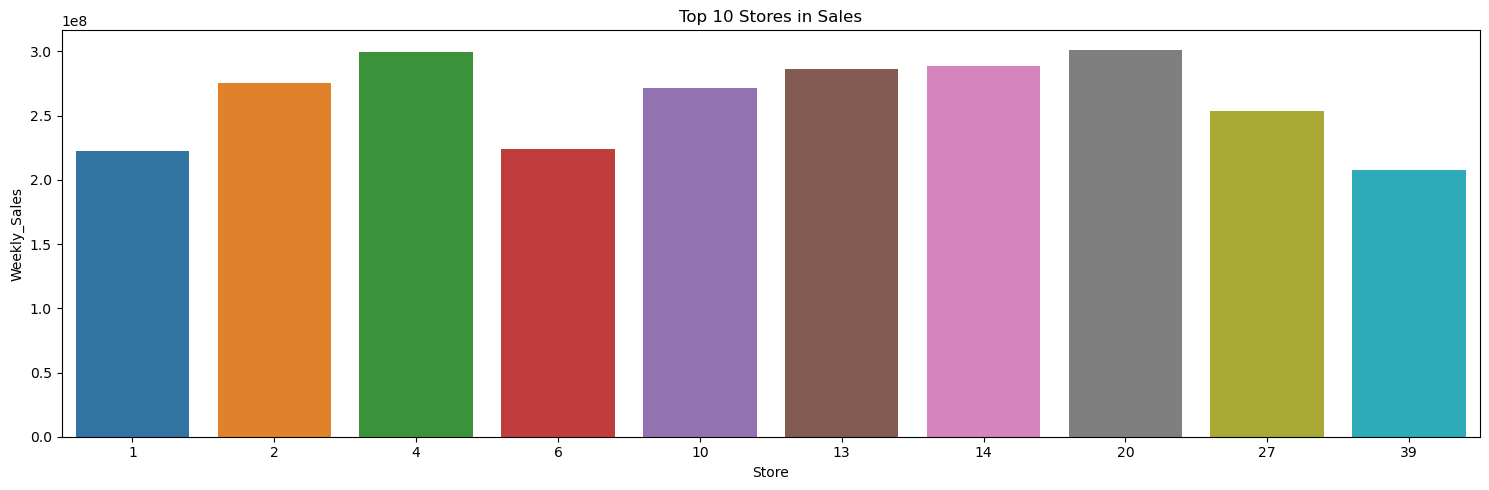

In [16]:
# plotting the top 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store) # creating the barplot
plt.title('Top 10 Stores in Sales') # putting title
plt.xlabel('Store') # assigening the X label as "Store"
plt.ylabel('Weekly_Sales') # assigening the Y label as "Weekly Sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # showing the plot

## Inference:
- **The Stores 4, 14, 20 is having the highest sales in top 10 stores segment**
- **The Stores 1, 39 is having the Lowest sales in top 10 stores segment**
------

In [17]:
# Creating the dataframe which is having Bottom 10 stores that can have Lowest weekly sales
Bottom_10_Sale_Store = data_store_sales.sort_values(by='Weekly_Sales',ascending=False).tail(10)
Bottom_10_Sale_Store 

,Store,Weekly_Sales
28,29,77141554.31
15,16,74252425.40
36,37,74202740.32
29,30,62716885.12
2,3,57586735.07
37,38,55159626.42
35,36,53412214.97
4,5,45475688.90
43,44,43293087.84
32,33,37160221.96


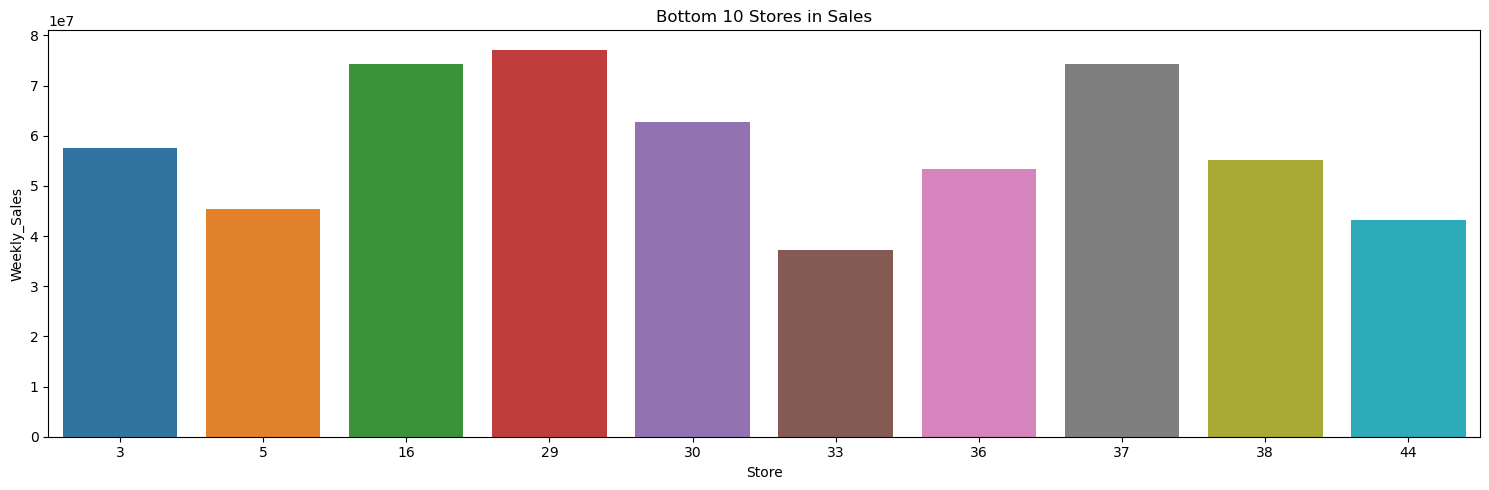

In [18]:
# plotting the Bottom 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store) # creating the barplot
plt.title('Bottom 10 Stores in Sales') # Set the titles
plt.xlabel('Store') # asigening the 'X' label as "Store"
plt.ylabel('Weekly_Sales') # asigening the 'Y' label as "Weekly sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # Showing the plots

## Inference:
- **The Stores 16, 29, 37 is having the highest sales in Bottom 10 stores segment**
- **The Stores 33, 44 is having the lowest sales in Bottom 10 stores segment**
----------

### Date V/s Weekly Sales

In [19]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010


In [ ]:
# Creating the dataframe by grouping the date and adding all the weekly sales for the particular 'Date'
data_date_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
data_date_sales=data_date_sales.sort_values(by='Date',ascending=True) # Sorting the values in the dataframe to ascending
data_date_sales.head(5) # Looking at first five data points

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [21]:
data_date_sales.shape

(143, 2)

Text(0, 0.5, 'Sales')

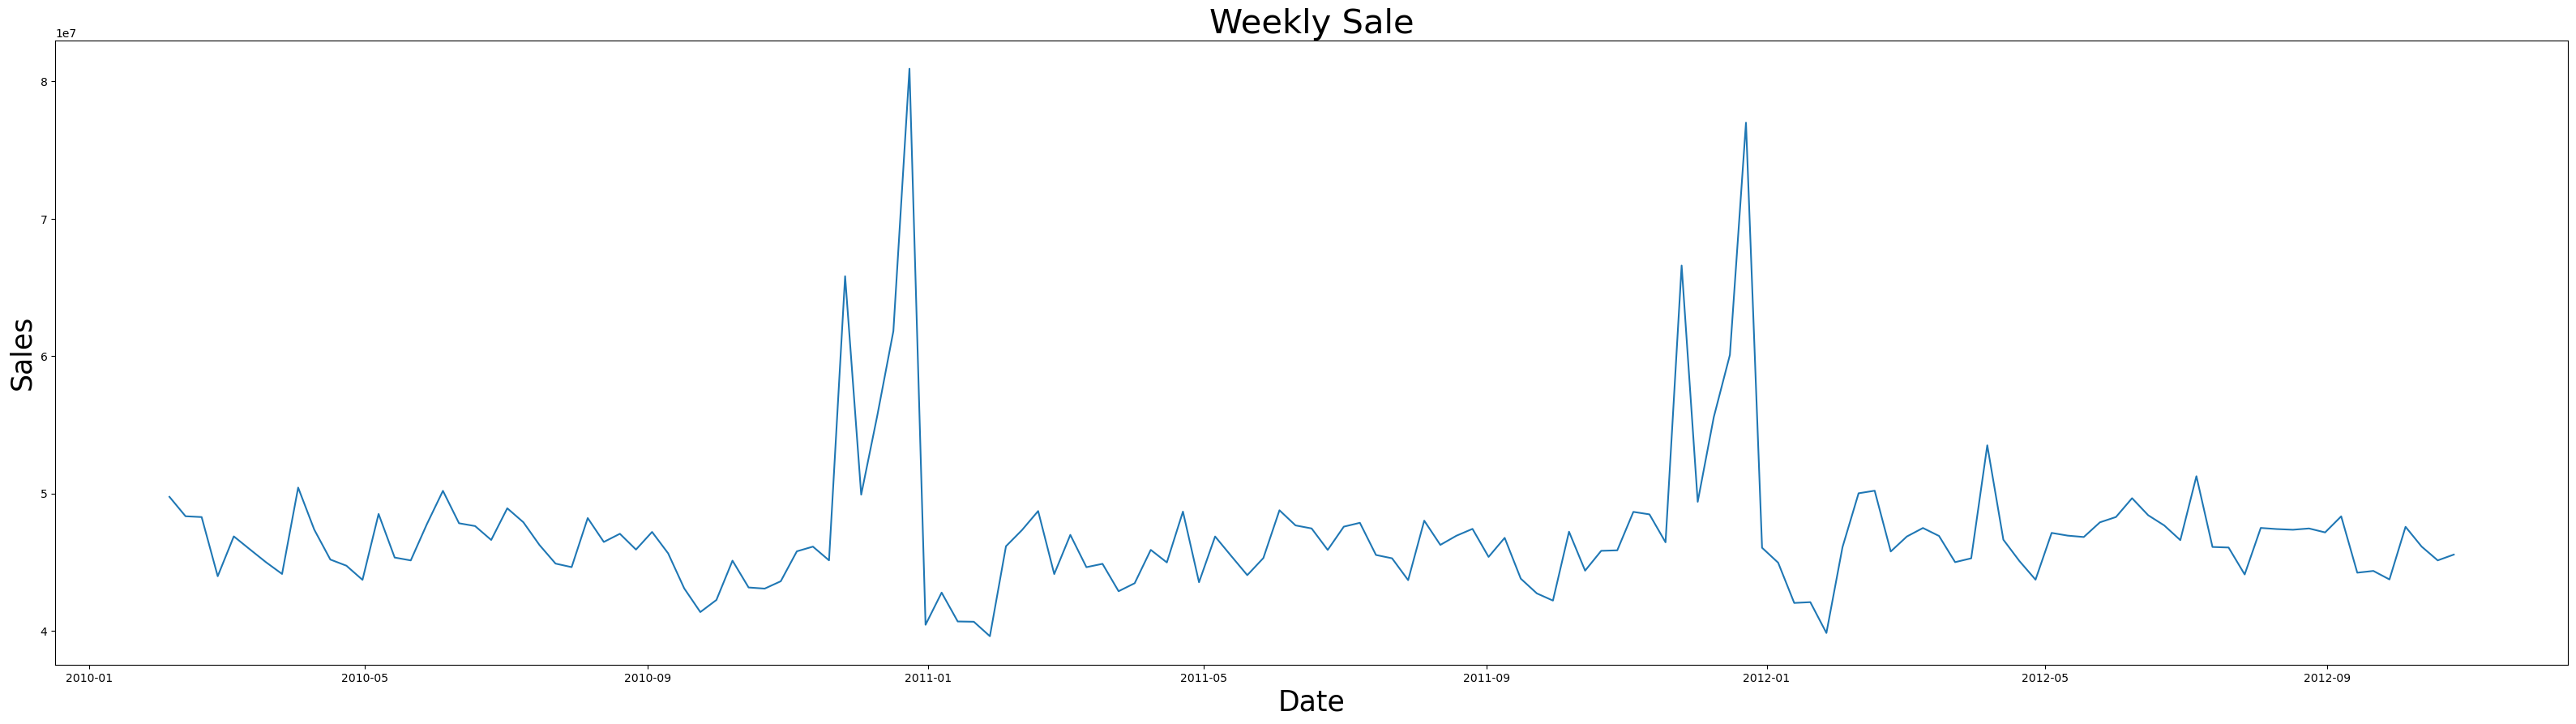

In [22]:
# Plotting the line chart for checking the trend of weekly sales
plt.figure(figsize=(40,10)) # Setting the size for plot
sns.lineplot(x='Date',y='Weekly_Sales',data=data_date_sales) # line plot
plt.title('Weekly Sale',fontsize=30) # setting titile
plt.xlabel('Date',fontsize=25) # xLabel as Date
plt.ylabel('Sales',fontsize=25) # Ylabel as Sales

### Inference:
- **There is a repeating pattern in this diagram indiacating a seasonal trend.**
- **There is a Seasonal Change in the quarters of each year**
- **We will See what quarters they are**
-----------

In [23]:
# Categorizing the sales into quarters
data['Quarters'] = data['Date'].dt.to_period("Q")

In [24]:
# creating a new dataframe by grouping the quarters with summation of the weekly sales
data_quarter_sales = data.groupby('Quarters')['Weekly_Sales'].sum().reset_index()

In [25]:
data_quarter_sales

,Quarters,Weekly_Sales
0,2010Q1,3.722528e+08
1,2010Q2,6.103695e+08
2,2010Q3,5.974881e+08
3,2010Q4,7.087757e+08
4,2011Q1,5.293917e+08
5,2011Q2,5.979481e+08
6,2011Q3,6.393585e+08
7,2011Q4,6.815017e+08
8,2012Q1,5.924677e+08
9,2012Q2,6.182977e+08


<Axes: xlabel='Quarters', ylabel='Weekly_Sales'>

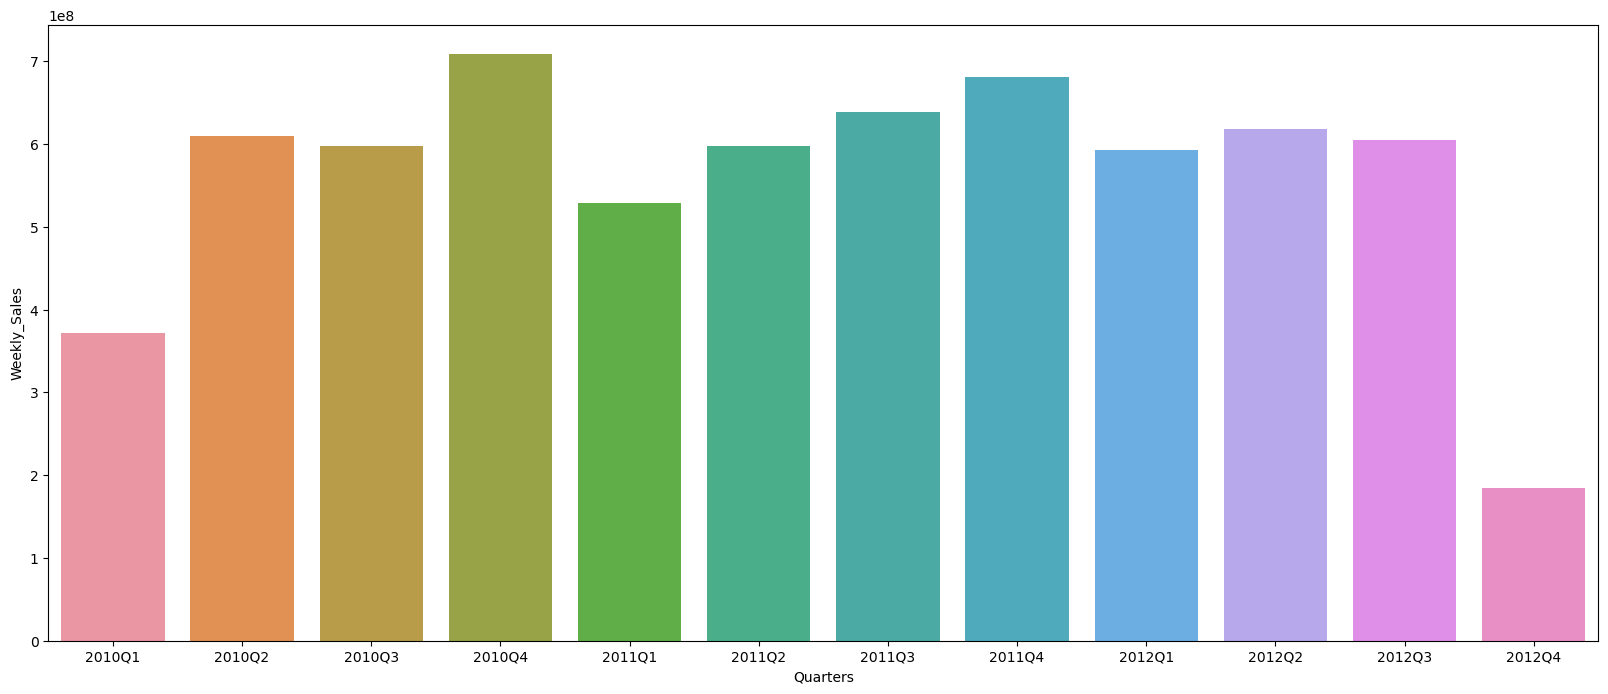

In [26]:
# Plotting barplot to asses the quarter wise sales
plt.figure(figsize=(20,8))
sns.barplot(x='Quarters',y='Weekly_Sales',data=data_quarter_sales)

### Inference:
- **In 2010 the Q2,Q4 Performed well**
- **In 2011 also perofomnce is continued and Q4 is in peak sales**
- **In 2012 the perofomnce got distrubed and Q2 Sales are high and Q4 is turned in very bad performance comparing all 3 years**
--------------------

## sales v/s Holidays

In [27]:
data['Holiday_Flag'].value_counts() # Checking the diffirent levels in Holiday column

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [28]:
# Creating a new datafram that contains holiday and weekly sales summation
data_Hf_Sales = data.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [29]:
data_Hf_Sales# Checking The Df

,Holiday_Flag,Weekly_Sales
0,0,6.231919e+09
1,1,5.052996e+08


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

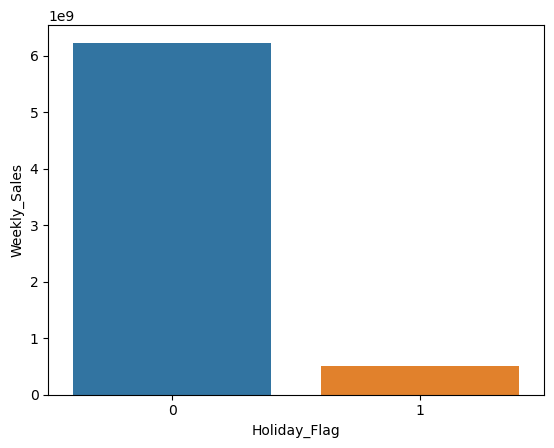

In [30]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=data_Hf_Sales) # Plotting the distribution

### Inference:
- **The Sales are High In Normal Days, it is Quite common because of that holidays are always low compared to working days**
----------

## Temperature v/s sales

In [31]:
data['Temperature'].min() # finding the lower band of Tempeture

-2.06

In [32]:
data['Temperature'].max() # finding the Upper band of Tempeture

100.14

In [33]:
bins = [0,25,50,75,100] # Creating bins to sort the tempeture values
labels = ['0-25','26-50','51-75','76-100'] # Labels

In [34]:
data['Temp_Category']= pd.cut(data['Temperature'],bins=bins,labels=labels) # Inserting the temperature values into the new column

In [35]:
data['Temp_Category'].value_counts() # Checking the diffirent columns in the temp category column

Temp_Category
51-75     2982
26-50     1631
76-100    1596
0-25       223
Name: count, dtype: int64

In [36]:
data['Temperature'] # This is the original data

0       42.31
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430    64.88
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64

In [37]:
data['Temp_Category'] # this data is for plotting and alaysis as we assign category to the data according to a parcticulat range

0       26-50
1       26-50
2       26-50
3       26-50
4       26-50
        ...  
6430    51-75
6431    51-75
6432    51-75
6433    51-75
6434    51-75
Name: Temp_Category, Length: 6435, dtype: category
Categories (4, object): ['0-25' < '26-50' < '51-75' < '76-100']

In [38]:
data.head(2)
# here both 42.31 and 38.51 comes in range of 26-50

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,Quarters,Temp_Category
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,2010Q1,26-50
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010,2010Q1,26-50


In [39]:
# finding sales pattren during these temp levels
data_temp_sales = data.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Temp_Category', ylabel='Weekly_Sales'>

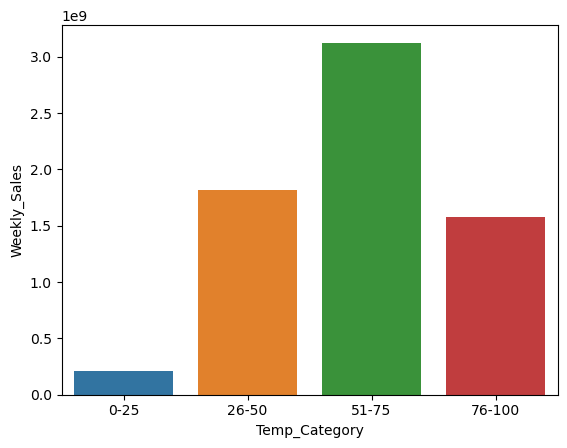

In [40]:
# Plotting the weekly sales distribution on barplot
sns.barplot(x='Temp_Category',y='Weekly_Sales',data=data_temp_sales)

### Inference:
- **Stores perform well in moderate temp that is 26-50**
- **Sales went peaks in Moderate to High temp that is 51-75**
- **Sales went down in Very High and Low temp that is 0-25 & 76-100**
----------

## Fuel_Price V/s Sales

In [41]:
data['Fuel_Price']
# rage of fuel_price is between 2 to 4.5

0       2.572
1       2.548
2       2.514
3       2.561
4       2.625
        ...  
6430    3.997
6431    3.985
6432    4.000
6433    3.969
6434    3.882
Name: Fuel_Price, Length: 6435, dtype: float64

In [42]:
data['Fuel_Price'].min() # Checking the lower price band for fuel

2.472

In [43]:
data['Fuel_Price'].max() # Checking the Upper price band for fuel

4.468

In [44]:
bins1 = [2,2.5,3,3.5,4,4.5] # Creating bins and labels to categorize the fuel prices
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']

In [45]:
data['Fuel_Price_Category']= pd.cut(data['Fuel_Price'],bins=bins1,labels=labels1) # creating new column Fuel price category

In [46]:
data['Fuel_Price_Category'].value_counts() # Checking the different levels in the Fuel_Price_Cat

Fuel_Price_Category
3.6-4      2625
2.6-3      1872
3.1-3.5    1533
4.1-4.5     404
2-2.5         1
Name: count, dtype: int64

In [47]:
data_Fuel_Price_Sales = data.groupby('Fuel_Price_Category')['Weekly_Sales'].sum().reset_index() # setting above values into pandas dataframe

In [48]:
data_Fuel_Price_Sales

,Fuel_Price_Category,Weekly_Sales
0,2-2.5,4.702810e+05
1,2.6-3,1.948480e+09
2,3.1-3.5,1.629321e+09
3,3.6-4,2.739146e+09
4,4.1-4.5,4.198009e+08


<Axes: xlabel='Fuel_Price_Category', ylabel='Weekly_Sales'>

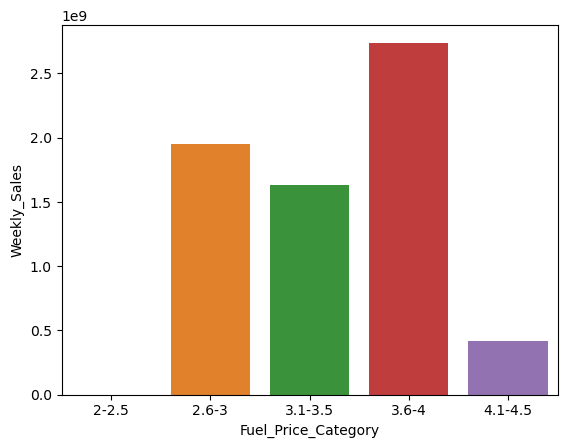

In [49]:
sns.barplot(x='Fuel_Price_Category',y='Weekly_Sales',data=data_Fuel_Price_Sales)

# Inference:
- **When the fuel prices are moderate the performance of stores are also moderatly high**
- **But the fuel Price went above the moderate level that is 3.6 - 4, and the sales are also went very High.. May be the Inflation and fear of increasing prices people are bought more grocery to metigate with inflation**
- **and when fuel price went even high (4.1 - 4.5) the purchase power of people went down. may be due to the inflation and increasing in goods price**
-----------------

## CPI v/s Sales

In [50]:
data['CPI']

0       211.096358
1       211.242170
2       211.289143
3       211.319643
4       211.350143
           ...    
6430    192.013558
6431    192.170412
6432    192.327265
6433    192.330854
6434    192.308899
Name: CPI, Length: 6435, dtype: float64

In [51]:
data['CPI'].min() # Checking the lower band of inflation

126.064

In [52]:
data['CPI'].max() # Checking the Upper band of inflation

227.2328068

In [53]:
bins2=[125,155,185,215,245] # Creating bins and labels for categorization of inflation rate
labels2=['125-155','156-185','186-215','216-245',]

In [54]:
data['CPI_category']= pd.cut(data['CPI'],bins=bins2,labels=labels2) # Creating a new column called CPI Category

In [55]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,Quarters,Temp_Category,Fuel_Price_Category,CPI_category
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,2010Q1,26-50,2.6-3,186-215
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010,2010Q1,26-50,2.6-3,186-215
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010,2010Q1,26-50,2.6-3,186-215
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010,2010Q1,26-50,2.6-3,186-215
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010,2010Q1,26-50,2.6-3,186-215


In [56]:
data['CPI_category'].value_counts() # Checking diffirent levels in inflation

CPI_category
125-155    3146
186-215    2010
216-245    1159
156-185     120
Name: count, dtype: int64

In [57]:
data_CPI_Sales = data.groupby('CPI_category')['Weekly_Sales'].sum().reset_index() # new data

In [58]:
data_CPI_Sales

,CPI_category,Weekly_Sales
0,125-155,3.406971e+09
1,156-185,1.751615e+08
2,186-215,2.032509e+09
3,216-245,1.122578e+09


<Axes: xlabel='CPI_category', ylabel='Weekly_Sales'>

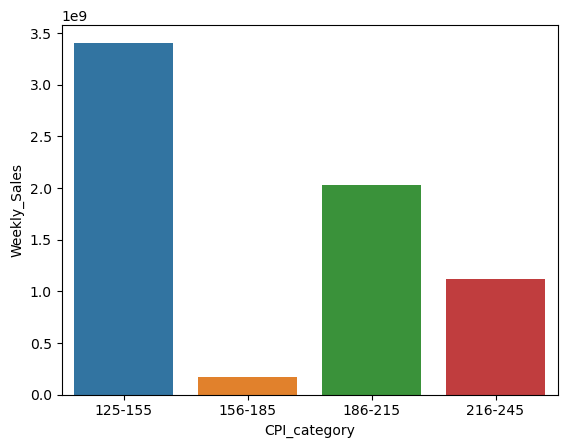

In [59]:
sns.barplot(x='CPI_category',y='Weekly_Sales',data=data_CPI_Sales)

### Inference:
- **When inflation is lower the performance of stores are high.**
- **In intial time of inflation the sale were drop signficantly.**
- **In third level when inflation is high, the people were scared for future prices and bought more grocery for future needs also.**
- **Eventually when the inflation went peaks the sales are went down.**
---

## Unemployment V/s Sales

In [60]:
data['Unemployment']

0       8.106
1       8.106
2       8.106
3       8.106
4       8.106
        ...  
6430    8.684
6431    8.667
6432    8.667
6433    8.667
6434    8.667
Name: Unemployment, Length: 6435, dtype: float64

In [61]:
data['Unemployment'].min() # Cheking the lower band of unemp rate

3.879

In [62]:
data['Unemployment'].max() # Cheking the Upper band of unemp rate

14.313

In [63]:
bins3=[4,6,8,10,12] # Creating the bins and labels to store the values
labels3=['4-6','6.1-8','8.1-10','10.1-12']

In [64]:
data['Unemployment_Category'] = pd.cut(data['Unemployment'],bins=bins3,labels=labels3) # creating the new column in the dataframe

In [65]:
data['Unemployment_Category'].value_counts() #Checking the diffirent levels in the UnEmp Column

Unemployment_Category
6.1-8      2795
8.1-10     2389
4-6         618
10.1-12     290
Name: count, dtype: int64

In [66]:
data_Un_Emp_Sales = data.groupby('Unemployment_Category')['Weekly_Sales'].sum().reset_index() 
# Creating separte dataframe for the sales and UnEmp rate

<Axes: xlabel='Unemployment_Category', ylabel='Weekly_Sales'>

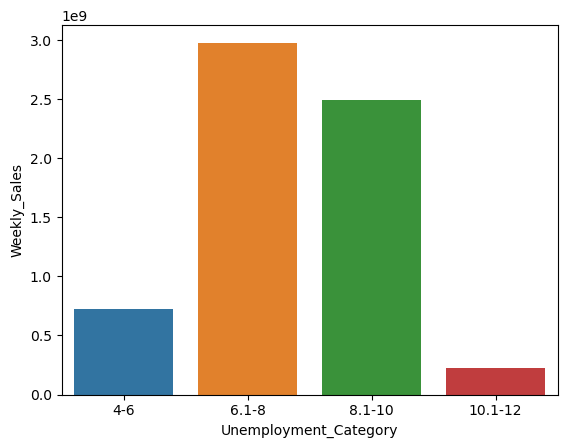

In [67]:
sns.barplot(x='Unemployment_Category',y='Weekly_Sales',data=data_Un_Emp_Sales)

### Inference
- **When the Unemployment rate is between the 6 to 10 the stores are performing well**
- **But whenever the Unemployment rate is increasing the sales went down**
**_______________________________________________________________________________________________________________________**

In [68]:
data_corr = data[['Store','Date','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price', 'CPI','Unemployment']].copy()
data_corr # Here we create a copy of required columns for correlation.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


<Axes: >

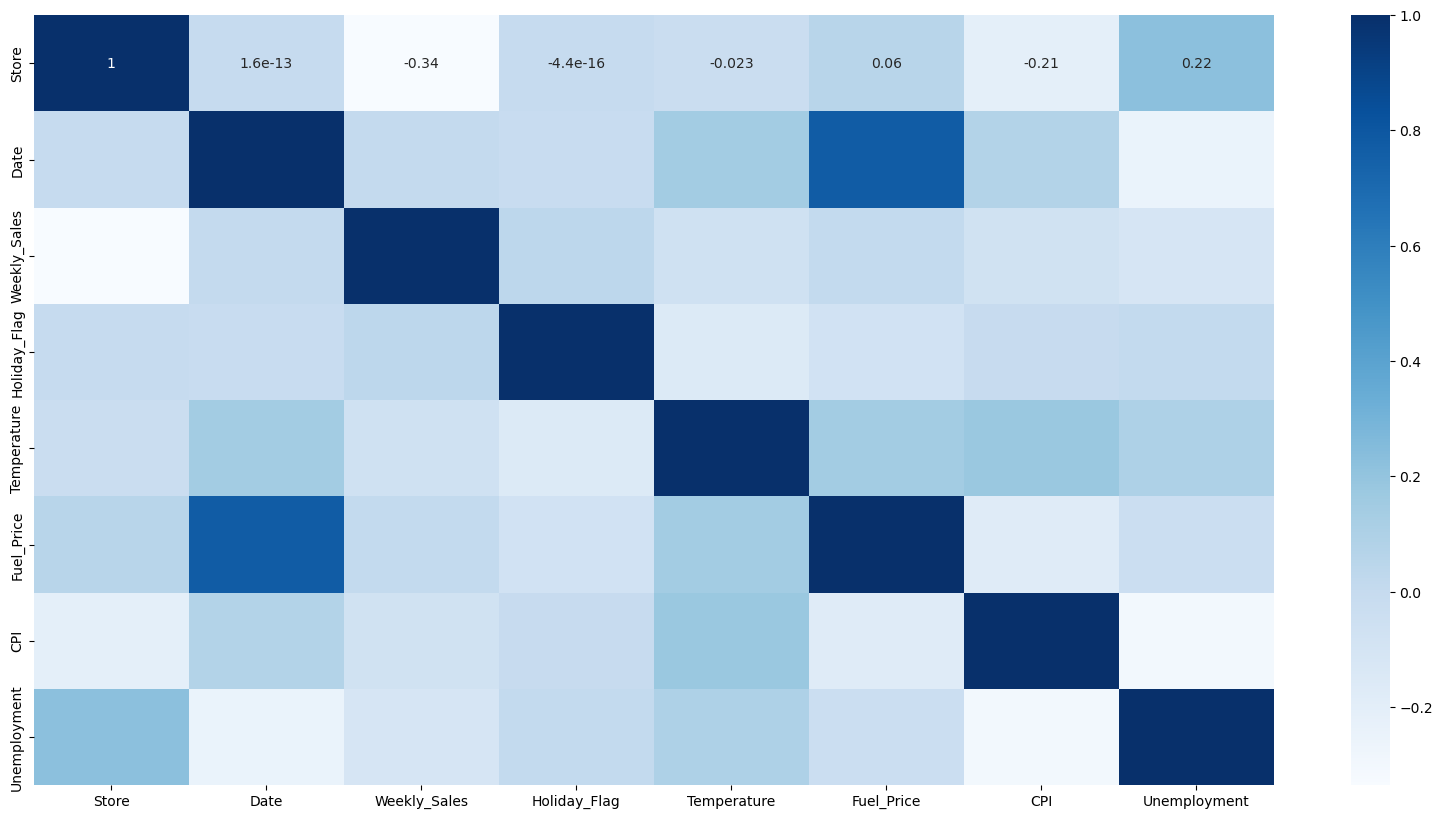

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(data_corr.corr(),annot=True, cmap="Blues")


- With the help off above diagram we can see how much or less every column affect each other.
- it shows whether two columns are having a Positive coorelation or a negative corelation.
- The Positive numbers indicates a Positive correlation.
- The Negative numbers indicates a Negative correlation.

=====================================================================================================================================================

# 1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

## a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

Total Stores are affected by Unemployment:45 
Most affected stores by unemployment:
 Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
dtype: float64


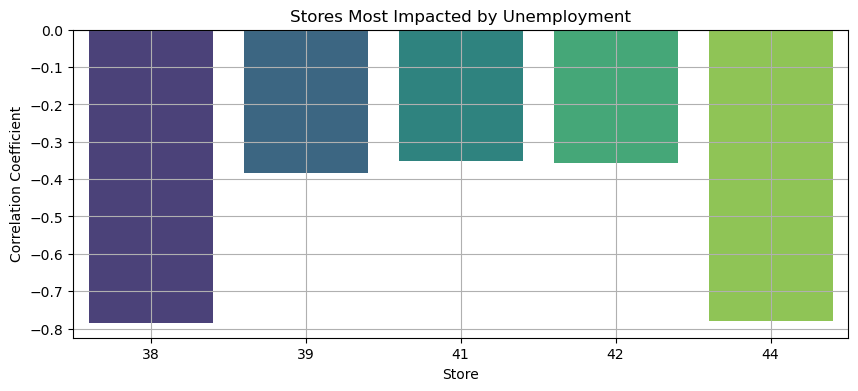

In [70]:
# Correlation analysis per store
corr_unemployment_store = data.groupby('Store').apply(
    lambda x: x[['Weekly_Sales', 'Unemployment']].corr().iloc[0, 1]
    ).sort_values()

# Top 5 most affected stores (strongest negative correlation)
affected_stores = corr_unemployment_store.head(5)
print(f"Total Stores are affected by Unemployment:{len(corr_unemployment_store)} ")
print(f"Most affected stores by unemployment:\n {affected_stores}")

# Visualization
plt.figure(figsize=(10, 4))
sns.barplot(x=affected_stores.index, y=affected_stores.values, palette='viridis')
plt.title('Stores Most Impacted by Unemployment')
plt.ylabel('Correlation Coefficient')
plt.grid()
plt.show()


- **Store 4, Store 13, Store 39, Store 42 and Store 44 are suffering the most due to unemployment**.


| Unemployment Rate | Consumer Confidence | Consumer Spending | Impact on Weekly Store Sales                          |
|-------------------|---------------------|-------------------|------------------------------------------------------|
| High              | Low                 | Reduced           | Decreased sales, especially discretionary; more discounts |
| Low               | High                | Increased         | Increased sales, business growth


------------------------------------------------------------------------------------------------------------------------------------------

## b. If the weekly sales show a seasonal trend, when and what could be the reason?

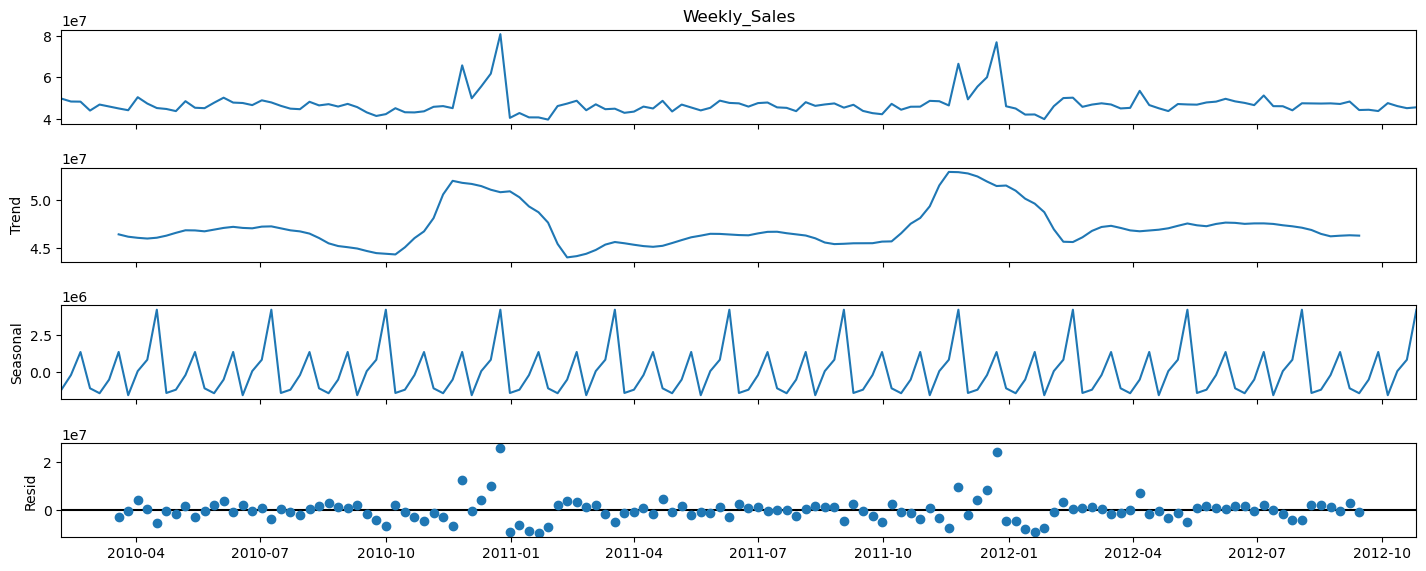

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Weekly Sales
data_stores_sales =data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Setting the Date column as an Index
data_stores_sales.set_index('Date',inplace=True)

sales_decomposition=seasonal_decompose(data_stores_sales['Weekly_Sales'],period=12)



fig = sales_decomposition.plot()
fig.set_size_inches(16, 6)  # Set width and height
plt.show()


- Inference:
    - As we can see in the trend component there is seasonal spikes from 2010-11 upto 2011-01, then after again in 2011-11 to 2012-01 there is a seacond seasonal spike, but in 2012 year there is no that much spike due to small data.
    - its winter season, and the Temperature may impact the sales, lets see

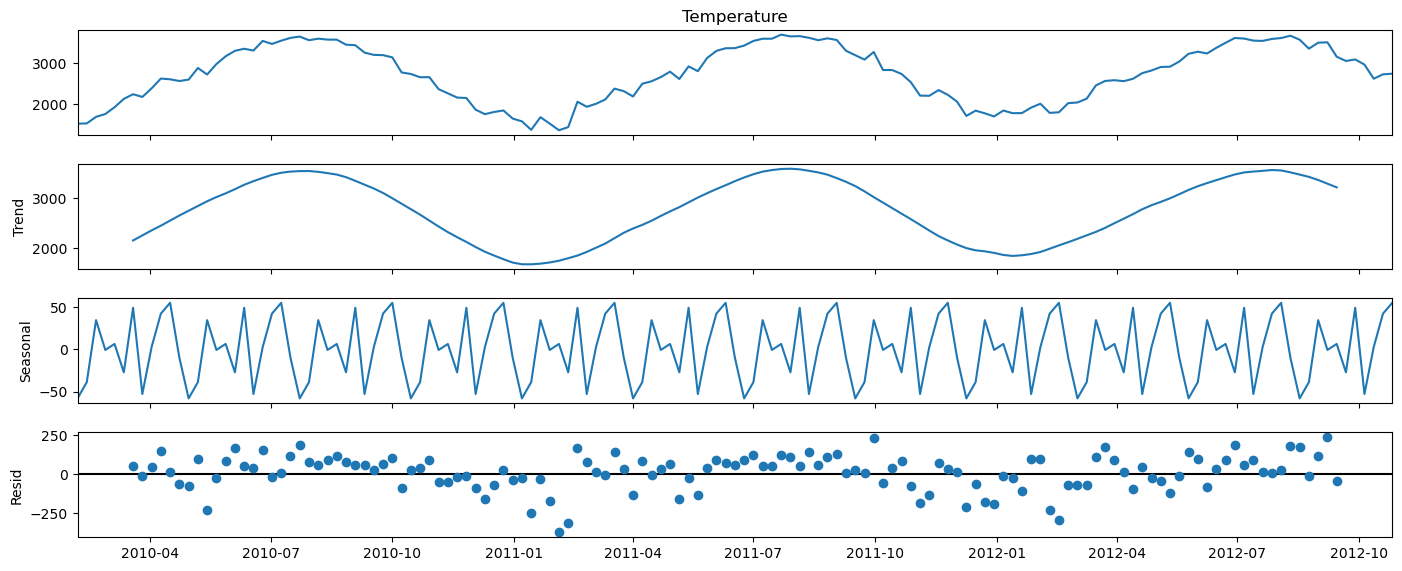

In [72]:
# Temperature
data_Temperature =data.groupby('Date')['Temperature'].sum().reset_index()

# Setting the Date column as an Index
data_Temperature.set_index('Date',inplace=True)

Temperature_decomposition=seasonal_decompose(data_Temperature['Temperature'],period=12)

fig = Temperature_decomposition.plot()
fig.set_size_inches(16, 6)  # Set width and height
plt.show()


- Observations :
    - Regarding the Temperature data, a seasonal downward trend is observed starting from 2010-09 until 2011-01. Subsequently, there's a gradual increase. However, from 2011-09, temperatures start to decline again.

    - In the Weekly Sales Data, there is a noticeable increase in sales starting from 2010-09, followed by a seasonal upward trend until 2011-01 . Afterward, the sales stabilize, eventually transitioning to a downward trend. This pattern is repeated from 2011-09 to 2012-01.

    - In summary, there appears to be an inverse relationship between Temperature and Weekly Sales. When temperatures decrease, weekly sales tend to rise, and vice versa. This inverse correlation is evident from 2010-09 to 2011-01, as well as from 2011-09 to 2012-01.

------------------------------------------------------------------------------------------------------------------------------------

## c. Does temperature affect the weekly sales in any manner?

Correlation: -0.0638100131794696


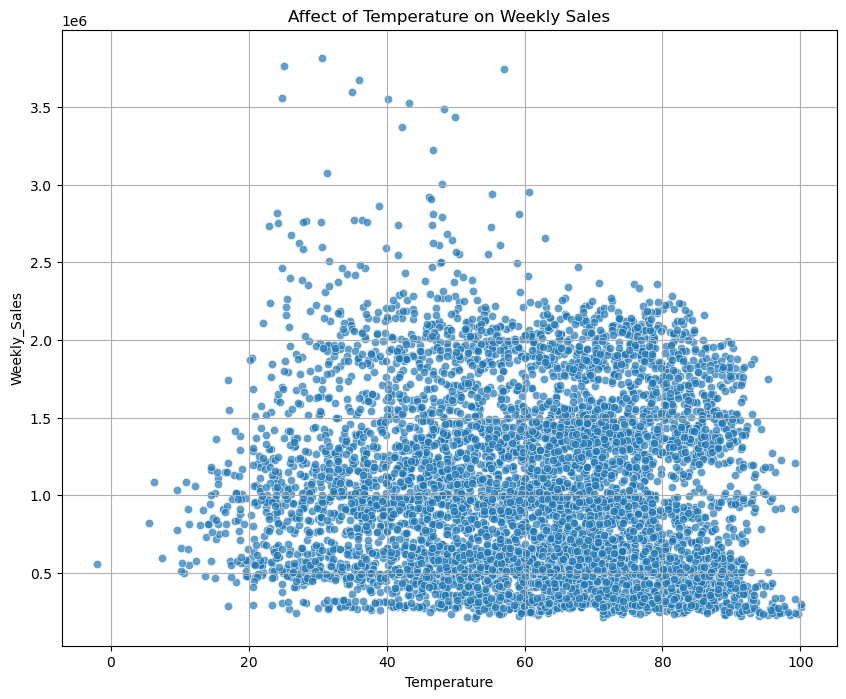

In [73]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=data ,x='Temperature',y='Weekly_Sales',alpha = 0.7)
plt.title("Affect of Temperature on Weekly Sales")
plt.grid()
plt.show

print("Correlation:", data['Weekly_Sales'].corr(data['Temperature']))

- Inference:
    - we can check by plotting the data.
    - Yes, there is a negative relation between Temperature & weekly Salesa as we can see in the above diagram.
    - we can see that, as the temperature increases all the dots start falling below 2.0 which shows a inverse relation between Temperature and Weekly sales.
    - This relation is also explained in the previous question.

----------------------------------------------------------------------------------------------------------------------------

## d. How is the Consumer Price index affecting the weekly sales of various stores?

In [74]:
data_CPI_Sales = data.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()


<Axes: >

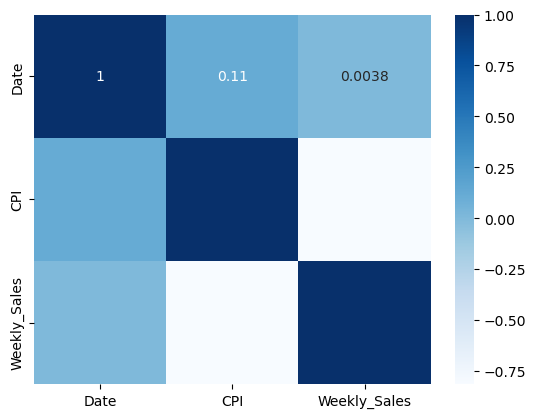

In [75]:
sns.heatmap(data_CPI_Sales.corr(),annot=True, cmap="Blues")


- Inference:
    - there is a nagative correlation between the CPI and weekly sales.
    - Yes there is a Nagative correlation and the CPI is affecting the Weekly Sales.
    - we can see that in below graph as well. when the CPI increasing the sales are down.




| CPI Trend               | Effect on Consumer Purchasing Power      | Impact on Weekly Sales                       |
|-------------------------|------------------------------------------|---------------------------------------------|
| Increasing CPI (Inflation) | Decreases real income and purchasing power | Reduced sales, especially discretionary goods |
| Stable or Decreasing CPI | Maintains or increases purchasing power | Stable or increased sales                    |


<Axes: xlabel='CPI_category', ylabel='Weekly_Sales'>

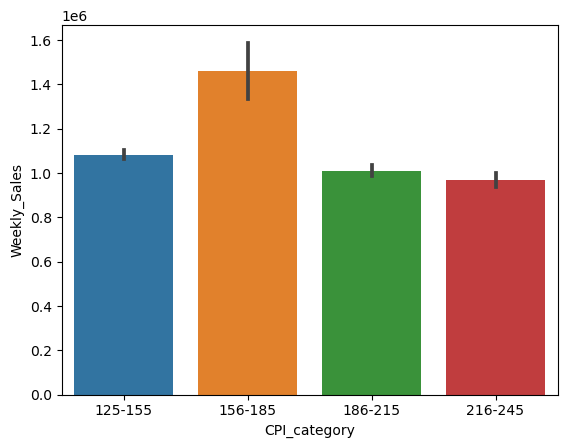

In [76]:
sns.barplot(x=data['CPI_category'],y=data['Weekly_Sales'])


---------------------------------------------------------------------------------------------------------------

## e. Top performing stores according to the historical data.

In [77]:
top_stores = data.groupby('Store')['Weekly_Sales'].sum().nlargest(5)
print(f"Top 5 best performing Stores : {top_stores}")

Top 5 best performing Stores : Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


-------------------------------------------------------------------------------------------------------------------------

## f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [78]:
bottom_stores = data.groupby('Store')['Weekly_Sales'].sum().nsmallest(5)
print(f"Top 5 best performing Stores : {bottom_stores}")

diff_highest_lowest = top_stores.max() - bottom_stores.min()
print(f"Sales Difference between highest and lowest selling stores : {round(diff_highest_lowest,2)}")

Top 5 best performing Stores : Store
33    37160221.96
44    43293087.84
5     45475688.90
36    53412214.97
38    55159626.42
Name: Weekly_Sales, dtype: float64
Sales Difference between highest and lowest selling stores : 264237570.5


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [79]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year,Quarters,Temp_Category,Fuel_Price_Category,CPI_category,Unemployment_Category
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,2010Q1,26-50,2.6-3,186-215,8.1-10
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010,2010Q1,26-50,2.6-3,186-215,8.1-10
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010,2010Q1,26-50,2.6-3,186-215,8.1-10
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010,2010Q1,26-50,2.6-3,186-215,8.1-10
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010,2010Q1,26-50,2.6-3,186-215,8.1-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9,2012,2012Q3,51-75,3.6-4,186-215,8.1-10
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,40,10,2012,2012Q4,51-75,3.6-4,186-215,8.1-10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,41,10,2012,2012Q4,51-75,3.6-4,186-215,8.1-10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,10,2012,2012Q4,51-75,3.6-4,186-215,8.1-10


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Store                  6435 non-null   int64         
 1   Date                   6435 non-null   datetime64[ns]
 2   Weekly_Sales           6435 non-null   float64       
 3   Holiday_Flag           6435 non-null   int64         
 4   Temperature            6435 non-null   float64       
 5   Fuel_Price             6435 non-null   float64       
 6   CPI                    6435 non-null   float64       
 7   Unemployment           6435 non-null   float64       
 8   week                   6435 non-null   UInt32        
 9   month                  6435 non-null   int32         
 10  year                   6435 non-null   int32         
 11  Quarters               6435 non-null   period[Q-DEC] 
 12  Temp_Category          6432 non-null   category      
 13  Fue

In [81]:
df = data[['Date','Weekly_Sales']].copy()
df.set_index("Date",inplace = True)

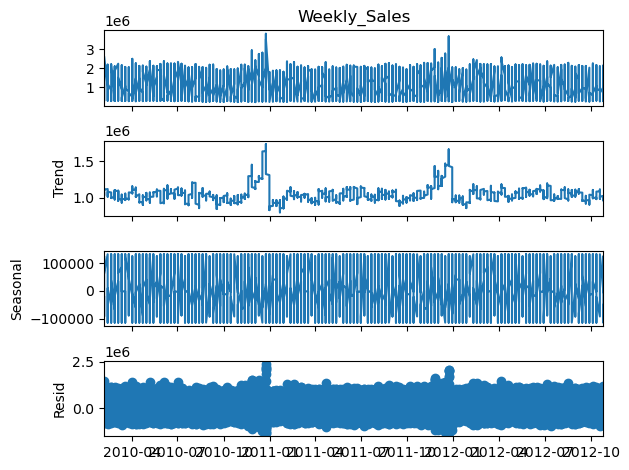

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
# sort the data according to the date
df = df.sort_index()
# Store the decomposed Values in Decompose Variable
decompose = seasonal_decompose(df['Weekly_Sales'] , period = 52)
#plot the decoposed data to see the trends , seasonality and Resid
decompose.plot()
plt.show()

In [83]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the list of specific stores (replace [1, 2, 3, 4, 5] with your target stores)
specific_stores = [2,4,13,14,20]

# Initialize DataFrame to store forecasts
forecast_df = pd.DataFrame()

for store in specific_stores:
    # Filter data for the current store
    store_data = data[data['Store'] == store].set_index('Date')['Weekly_Sales']
    
    # Fit SARIMAX model (adjust hyperparameters as needed)
    model = SARIMAX(store_data, order=(1,1,1), seasonal_order=(1,1,1,52))
    results = model.fit(disp=False)
    
    # Forecast next 12 weeks
    forecast = results.get_forecast(steps=12)
    
    # Extract forecasted values and dates
    last_date = store_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=12, freq='W')
    forecast_df[f'Store_{store}'] = forecast.predicted_mean.values

# Set future dates as index
forecast_df.index = future_dates
forecast_df.index.name = 'Date'

print("Forecasted Weekly Sales for the Next 12 Weeks:")
print(forecast_df.round(2))  # Rounds values to 2 decimal places


c:\Users\parth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\parth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\parth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\parth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
c:\Users\parth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


Forecasted Weekly Sales for the Next 12 Weeks:
               Store_2     Store_4    Store_13    Store_14    Store_20
Date                                                                  
2012-11-04  1989974.27  2255761.71  2102113.55  1773523.09  2222942.53
2012-11-11  1958135.65  2184874.79  2167156.53  1716684.46  2213658.54
2012-11-18  1946092.56  2222896.34  2086441.81  1621523.17  2133580.40
2012-11-25  2559795.98  2910825.22  2829236.70  2237780.70  2733516.39
2012-12-02  1991592.85  2167158.12  2121764.07  1778251.32  2258127.57
2012-12-09  2283043.38  2461814.56  2481120.93  2048783.28  2469969.98
2012-12-16  2411265.53  2703019.28  2742434.94  2154986.25  2631823.15
2012-12-23  3096946.74  3520696.87  3441603.69  2824026.63  3297105.54
2012-12-30  1910506.77  2007001.15  2037210.48  1542642.98  2011185.14
2013-01-06  1850960.07  2044433.53  1953774.99  1530523.58  1959643.95
2013-01-13  1807033.48  1950981.96  1893810.91  1404451.54  1926629.71
2013-01-20  1775005.52  201190

## Why Time Series Forecasting :

The dataset contains weekly sales data recorded over time along with related variables such as holidays, temperature, fuel price, CPI, and unemployment. Time series forecasting is best suited for this data because:

- **Captures Temporal Patterns:**  
  The data is organized chronologically, allowing time series models to identify and model trends, seasonality, and recurring patterns in sales.

- **Improves Demand Planning:**  
  By analyzing historical sales, forecasts can optimize inventory management, reducing stockouts and overstock situations.

- **Accounts for Seasonality and Events:**  
  Time series models incorporate effects of holidays, weather changes, and economic factors, enabling better anticipation of sales fluctuations.

- **Supports Data-Driven Decisions:**  
  Accurate sales forecasts help in budgeting, marketing, staffing, and supply chain management for improved operational efficiency.

- **Handles Multivariate Influences:**  
  Advanced models can include external variables like CPI, fuel price, and unemployment to refine predictions.

- **Industry Standard for Retail:**  
  Time series forecasting is widely used in retail to address fluctuating demand and seasonal effects, making it ideal for this dataset.

### Summary

| Reason                        | How Time Series Forecasting Helps                        |
|------------------------------|----------------------------------------------------------|
| Temporal structure            | Models trends, cycles, and seasonality in sales          |
| Demand planning              | Optimizes inventory and reduces costs                     |
| Event/seasonality sensitivity | Predicts effects of holidays, weather, or promotions     |
| Multivariate capability       | Incorporates economic and external factors               |
| Decision support             | Enables data-driven marketing, staffing, and budgeting   |

Time series forecasting leverages the historical and temporal nature of the sales data, making it the most effective tool for predicting future sales and optimizing retail operations.
